# Game: Tic Tac Toe

## 1. Rules

Tic-Tac-Toe is normally played with two people. One player is X and the other is O. 
Players take turns placing their X or O. 
If a player gets three of their marks on the board in a row, column, or diagonal, they win. 
When the board fills up with neither player winning, the game ends in a draw.

## 2. Flowchart

In [1]:
from graphviz import Digraph

In [2]:
dot = Digraph(comment='TicTacToe Flowchart')

dot.node('START', 'START', shape='oval', style='filled', fillcolor='grey')
dot.node("Ask for Player's letter", "Ask for Player's letter")
dot.node('Decide who Goes First', 'Decide who Goes First')

dot.node('Display Board', 'Display Board', style='filled', fillcolor='white')
dot.node("Ask for Player's Move", "Ask for Player's Move", style='filled', fillcolor='white')
dot.node("Check Player's Winning Condition", "Check Player's \n Winning Condition", style='filled', fillcolor='white')

player_wins = Digraph('Player wins', node_attr={'shape': 'doublecircle', 'color': 'green', 'style': 'filled', 'fillcolor': 'white'})
player_wins.node('Win','Win')
dot.subgraph(player_wins)

dot.node("Check Tie Condition after Player's Move", "Check Tie Condition \n after Player's Move", style='filled', fillcolor='white')
nobody_wins_p = Digraph('Nobody wins p', node_attr={'shape': 'doublecircle', 'color': 'blue', 'style': 'filled', 'fillcolor': 'white'})
nobody_wins_p.node('Tie p','Tie')
dot.subgraph(nobody_wins_p)
    
dot.node("Get Computer's Move", "Get Computer's Move", style='filled', fillcolor='white')
dot.node("Check Computer's Winning Condition", "Check Computer's \n Winning Condition", style='filled', fillcolor='white')

computer_wins = Digraph('Computer wins', node_attr={'shape': 'doublecircle', 'color': 'red', 'style': 'filled', 'fillcolor': 'white'})
computer_wins.node('Lose','Lose')
dot.subgraph(computer_wins)

dot.node("Check Tie Condition after Computer's Move", "Check Tie Condition \n after Computer's Move", style='filled', fillcolor='white')
nobody_wins_c = Digraph('Nobody wins c', node_attr={'shape': 'doublecircle', 'color': 'blue', 'style': 'filled', 'fillcolor': 'white'})
nobody_wins_c.node('Tie c','Tie')
dot.subgraph(nobody_wins_c)

dot.node('Play Again?', 'Play Again?')
dot.node('END', 'END', shape='oval', style='filled', fillcolor='grey')

In [3]:
dot.edge('START', "Ask for Player's letter")
dot.edge("Ask for Player's letter", 'Decide who Goes First')

dot.edge('Decide who Goes First', 'Display Board', label='Player \n Goes \n First')

with dot.subgraph(name="cluster_player") as p:
    p.attr(style='filled', color='lightgrey')
    #p.node_attr.update(style='filled', color='white')
    p.edge('Display Board', "Ask for Player's Move")
    p.edge("Ask for Player's Move", "Check Player's Winning Condition")
    p.edge("Check Player's Winning Condition", 'Win', label='Player has \n na complete line')
    p.edge("Check Player's Winning Condition", "Check Tie Condition after Player's Move", label="Player does not have \n a complete line")
    p.edge("Check Tie Condition after Player's Move", "Tie p", label="No More \n Available \n Moves")
    p.attr(label="Player's Turn")
    
dot.edge("Win", 'Play Again?')
dot.edge("Tie p", 'Play Again?')
dot.edge("Check Tie Condition after Player's Move", "Get Computer's Move", label='Still \n Available \n Moves')    
         
dot.edge('Decide who Goes First', "Get Computer's Move", label='Computer \n Goes \n First')

with dot.subgraph(name="cluster_computer") as c:
    c.attr(style='filled', color='lightgrey')
    #c.node_attr.update(style='filled', color='white')
    c.edge("Get Computer's Move", "Check Computer's Winning Condition")
    c.edge("Check Computer's Winning Condition", 'Lose', label='Computer has \n a complete line')      
    c.edge("Check Computer's Winning Condition", "Check Tie Condition after Computer's Move", label="Computer does not have \n a complete line")
    c.edge("Check Tie Condition after Computer's Move", "Tie c", label="No More \n Available \n Moves")
    c.attr(label="Computer's Turn")
    
dot.edge("Lose", 'Play Again?')
dot.edge("Tie c", 'Play Again?')
dot.edge("Check Tie Condition after Computer's Move", 'Display Board', label='Still \n Available \n Moves')

dot.edge('Play Again?', "Ask for Player's letter", label='Yes')
dot.edge('Play Again?', 'END', label='No')

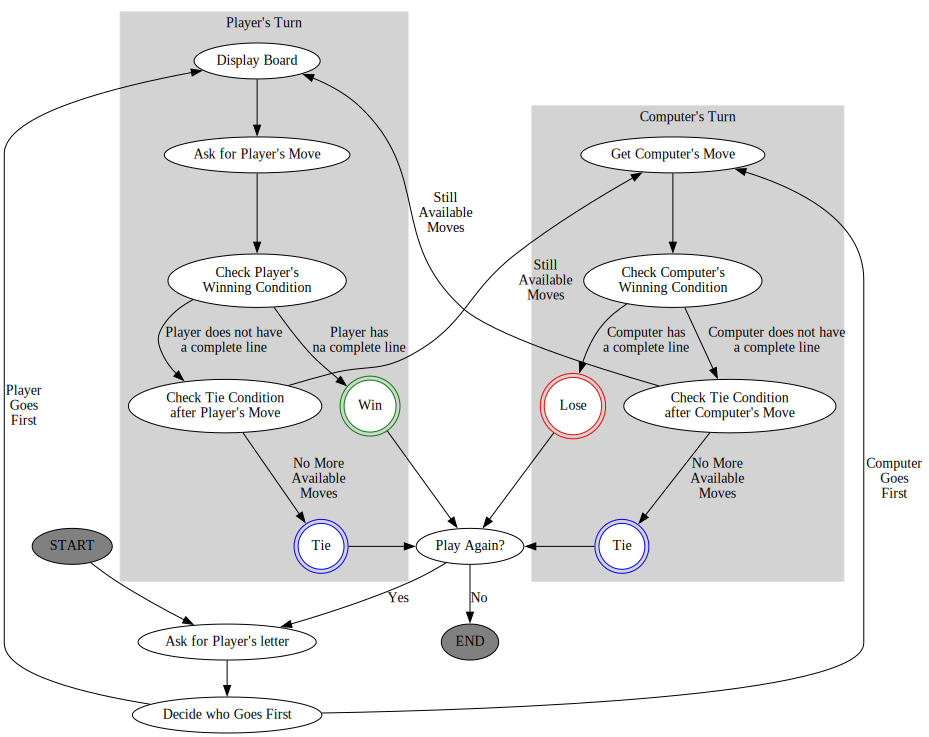

In [4]:
dot

## 3. Program

In [5]:
import random

In [6]:
# Function prints out the board that it was passed.
def drawBoard(board):
    # "board" is a list of 10 strings representing the board (ignore index 0)
    print(board[7] + '|' + board[8] + '|' + board[9])
    print('-+-+-')
    print(board[4] + '|' + board[5] + '|' + board[6])
    print('-+-+-')
    print(board[1] + '|' + board[2] + '|' + board[3])

In [7]:
# Function lets the player type which letter they want to be.
def inputPlayerLetter():
    letter = ''
    while not (letter == 'X' or letter == 'O'):
        print('Do you want to be X or O?')
        letter = input().upper()
    # the first element in the list is the player's letter, the second is the computer's letter.
    if letter == 'X':
        return ['X', 'O']
    else:
        return ['O', 'X']

In [8]:
# Function randomly chooses the player who goes first.
def whoGoesFirst():
    if random.randint(0, 1) == 0:
        return 'computer'
    else:
        return 'player'

In [9]:
# Function placing a mark on the board
def makeMove(board, letter, move):
    board[move] = letter

In [10]:
# Function returns True if that player has won, given a board and a player's letter.
def isWinner(bo, le):
    # bo = board ; le = letter.
    return ((bo[7] == le and bo[8] == le and bo[9] == le) or # across the top
    (bo[4] == le and bo[5] == le and bo[6] == le) or # across the middle
    (bo[1] == le and bo[2] == le and bo[3] == le) or # across the bottom
    (bo[7] == le and bo[4] == le and bo[1] == le) or # down the left side
    (bo[8] == le and bo[5] == le and bo[2] == le) or # down the middle
    (bo[9] == le and bo[6] == le and bo[3] == le) or # down the right side
    (bo[7] == le and bo[5] == le and bo[3] == le) or # diagonal
    (bo[9] == le and bo[5] == le and bo[1] == le)) # diagonal

In [11]:
# Function makes a copy of the board list and returns it.
def getBoardCopy(board):
    boardCopy = []
    for i in board:
        boardCopy.append(i)
    return boardCopy

In [12]:
# Function returns True if the passed move is free on the passed board.
def isSpaceFree(board, move):
    return board[move] == ' '

In [13]:
# Function lets the player type in its move.
def getPlayerMove(board):
    move = ' '
    while move not in '1 2 3 4 5 6 7 8 9'.split() or not isSpaceFree(board, int(move)):
        print('What is your next move? (1-9)')
        move = input()
    return int(move)

In [14]:
# Function that either 1.returns a valid move from the passed list on the passed board or 2.returns None if there is no valid move.
def chooseRandomMoveFromList(board, movesList):
    possibleMoves = []
    for i in movesList:
        if isSpaceFree(board, i):
            possibleMoves.append(i)
    if len(possibleMoves) != 0:
        return random.choice(possibleMoves)
    else:
        return None

In [15]:
# Tic Tac Toe AI algorithm: Function determines where to move and return that move, given a board and the computer's letter.
def getComputerMove(board, computerLetter):
    if computerLetter == 'X':
        playerLetter = 'O'
    else:
        playerLetter = 'X'
    
    # 1.Check if the computer can win in the next move
    for i in range(1, 10):
        boardCopy = getBoardCopy(board)
        if isSpaceFree(boardCopy, i):
            makeMove(boardCopy, computerLetter, i)
            if isWinner(boardCopy, computerLetter):
                return i

    # 2.Check if the player could win on his next move, and block them.
    for i in range(1, 10):
        boardCopy = getBoardCopy(board)
        if isSpaceFree(boardCopy, i):
            makeMove(boardCopy, playerLetter, i)
            if isWinner(boardCopy, playerLetter):
                return i

    # 3.Try to take one of the corners, if they are free.
    move = chooseRandomMoveFromList(board, [1, 3, 7, 9])
    if move != None:
        return move

    # 4.Try to take the center, if it is free.
    if isSpaceFree(board, 5):
        return 5

    # 5.Move on one of the sides.
    return chooseRandomMoveFromList(board, [2, 4, 6, 8])

In [16]:
# Function returns True if every space on the board has been taken. Otherwise return False.
def isBoardFull(board):
    for i in range(1, 10):
        if isSpaceFree(board, i):
            return False
    return True

In [17]:
print('Welcome to Tic Tac Toe!')

while True:
    # Reset the board
    theBoard = [' '] * 10
    
    print('\nThe moves are from 1 to 9 according to the calculator pad order from image below')
    print('7|8|9\n4|5|6\n1|2|3\n')

    playerLetter, computerLetter = inputPlayerLetter()
    turn = whoGoesFirst()
    print('The ' + turn + ' will go first.')
    
    gameIsPlaying = True
    
    while gameIsPlaying:
        if turn == 'player':
            # Player's turn.
            drawBoard(theBoard)
            move = getPlayerMove(theBoard)
            makeMove(theBoard, playerLetter, move)

            if isWinner(theBoard, playerLetter):
                drawBoard(theBoard)
                print('Hooray! You have won the game!')
                gameIsPlaying = False
            else:
                if isBoardFull(theBoard):
                    drawBoard(theBoard)
                    print('The game is a tie!')
                    break
                else:
                    turn = 'computer'

        else:
            # Computer's turn.
            move = getComputerMove(theBoard, computerLetter)
            makeMove(theBoard, computerLetter, move)

            if isWinner(theBoard, computerLetter):
                drawBoard(theBoard)
                print('The computer has beaten you! You lose.')
                gameIsPlaying = False
            else:
                if isBoardFull(theBoard):
                    drawBoard(theBoard)
                    print('The game is a tie!')
                    break
                else:
                    turn = 'player'

    print('Do you want to play again? (yes or no)')
    if not input().lower().startswith('y'):
        break

Welcome to Tic Tac Toe!

The moves are from 1 to 9 according to the calculator pad order from image below
7|8|9
4|5|6
1|2|3

Do you want to be X or O?


 O


The computer will go first.
X| | 
-+-+-
 | | 
-+-+-
 | | 
What is your next move? (1-9)


 5


X| | 
-+-+-
 |O| 
-+-+-
 | |X
What is your next move? (1-9)


 9


X| |O
-+-+-
 |O| 
-+-+-
X| |X
What is your next move? (1-9)


 4


X| |O
-+-+-
O|O| 
-+-+-
X|X|X
The computer has beaten you! You lose.
Do you want to play again? (yes or no)


 no


## 4. Notes

### 4.1 Artificial Intelligence

The user plays against a simple artificial intelligence wihch is a computer program taht can intelligently respond to the player's moves.

### 4.2 Import a picture from computer

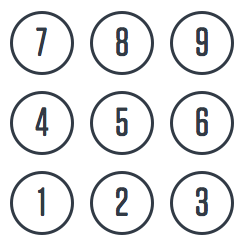

In [18]:
#Pad logic
from IPython.display import Image
Image(filename="C:/Users/pauly/OneDrive/Documents/PythonGameFolder/pad.png")

### 4.3 List references

Case 1: Assigning a value to variables

In [19]:
spam = 42
cheese = spam
spam = 100
print('spam:',spam,'cheese:',cheese)

spam: 100 cheese: 42


Spam and cheese are difference variables that store different values.

Case 2: Assigning a list reference to variables

In [20]:
spam=[0,1,2,3,4,5]
cheese=spam
cheese[1]='Hello'
print('spam:',spam,'cheese:',cheese)

spam: [0, 'Hello', 2, 3, 4, 5] cheese: [0, 'Hello', 2, 3, 4, 5]


In [21]:
spam={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f'}
cheese=spam
cheese[1]='Hello'
print('spam:',spam,'cheese:',cheese)

spam: {0: 'a', 1: 'Hello', 2: 'c', 3: 'd', 4: 'e', 5: 'f'} cheese: {0: 'a', 1: 'Hello', 2: 'c', 3: 'd', 4: 'e', 5: 'f'}


When you assign a list to a variable, you actually assign to the variable a reference to a list. A reference is a value that points to the location where some bit of data is stored. In othre words, the variable will not contain the list itself and the list exists outside of the variable. 

"chesse = spam" copies the list reference in spam to cheese, instead of copying the list value itself. 
Now both spam and cheese store a reference that refers to the same list value.
Consequently, even if the code only changed the cheese list, both the cheese and spam lists have changed.

Case 3: Creating two lits instead of copying references

In [22]:
spam=[0,1,2,3,4,5]
cheese=[0,1,2,3,4,5]
cheese[1]='Hello'
print('spam:',spam,'cheese:',cheese)

spam: [0, 1, 2, 3, 4, 5] cheese: [0, 'Hello', 2, 3, 4, 5]


In [23]:
spam={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f'}
cheese={0:'a',1:'b',2:'c',3:'d',4:'e',5:'f'}
cheese[1]='Hello'
print('spam:',spam,'cheese:',cheese)

spam: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f'} cheese: {0: 'a', 1: 'Hello', 2: 'c', 3: 'd', 4: 'e', 5: 'f'}
